# Homework9
## Ziyan Hu

In [45]:
import numpy as np
from scipy.stats import gamma
from matplotlib import pyplot as plt

## Q1

In [46]:
# 1.1
# define a function of monte carlo estimation
def mc_est(N):
    x = np.random.uniform(0,1,size=N)
    return np.mean(np.exp(-x**2))

# call the funciton with 1000 randomly generated numbers
means = [mc_est(1000) for i in range(100)]
print(np.mean(means))
print(np.std(means))

0.7467176330027233
0.006190943805875568


In [47]:
# 1.2
# Antithetic Variable
def av_est(N):
    x = np.random.uniform(0,1,size=N//2)
    x_av = 1 - x
    return np.mean(np.exp(-x**2) + np.exp(-x_av**2))

# call the funciton with 1000 randomly generated numbers
av_means = [av_est(1000) for i in range(100)]
print(np.mean(av_means))
print(np.std(av_means))

1.4935718293941544
0.0028273584093560906


## Q2

In [48]:
# 2.1
# generating uniform random numbers
N = 1000
u = np.random.uniform(0, 1, N)
g_u = np.sqrt(1 - u**2)
# Computing the correlation coefficients
rho_u2 = np.corrcoef(g_u, u**2)[0, 1]
rho_u = np.corrcoef(g_u, u)[0, 1]

print(rho_u2)
print(rho_u)

-0.9837065374832408
-0.9214337748865353


From above we can see that it is better to use $U^2$ rather than $U$ as the control variable, because the correlation of using $U^2$ is greater.

In [49]:
# 2.2
# Estimate with u2 control variate
def est_u2(N):
    u = np.random.uniform(0,1,size=N)
    u2 = u**2
    g = np.sqrt(1-u2)
    return np.mean(g) + rho_u2*(np.mean(u2) - 0.5)

u2_means = [est_u2(1000) for i in range(100)]
print(np.mean(u2_means))
print(np.std(u2_means))

0.9484051851424722
0.016827711378438977


In [50]:
# 2.3
# Estimate with u control variate
def est_u(N):
    u = np.random.uniform(0,1,size=N)
    g = np.sqrt(1-u**2)
    return np.mean(g) + rho_u*(np.mean(u) - 0.5)

u_means = [est_u(1000) for i in range(100)]
print(np.mean(u_means))
print(np.std(u_means))

0.7857955715414505
0.01634345500998245


## Q3

In [51]:
# 3.
# generating samples from the Exponential-Gamma mixture distribution
gam_samp = gamma.rvs(a=4, scale=0.5, size=1000)
exp_samp = np.random.exponential(1/gam_samp)

# displaying the first 10 samples from the exponential distribution
print(exp_samp[:10])

[2.46128909e-01 3.42771820e-02 6.02681346e-01 8.03900722e-01
 5.62718400e-01 2.34876215e+00 1.28167259e+00 2.49577562e-01
 9.89844021e-01 2.96840826e-04]


## Q4

In [52]:
# 4.1
# integral to estimate
def f(x):
    return x**4 + np.exp(-x**2)

# use MC integration between bounds
N = 100000
x = np.random.uniform(-1, 2, size=N)
mc_int = np.mean(f(x)) * (2 - (-1))

# compute c0
c0 = 1 / (mc_int + 1e-15)

print("Constant c0:", c0)

Constant c0: 0.12163499773206012


In [53]:
# 4.2
# define density function
def density(x):
    return c0*(x**4 + np.exp(-x**2))
N = 1000
# draw uniform samples on (-1, 2)
samp = np.random.uniform(-1,2,size=N)
# accept samples based on density ratio
accept = (density(samp) > np.random.uniform(size=N)) & (samp>-1) & (samp<2)

print("First 10 random samples:")
print(samp[accept][:10])

First 10 random samples:
[ 1.9121244   1.69110977  1.51901119  0.51562749  1.58816182  1.85574516
 -0.90068842  1.48099538  1.13097053 -0.2966492 ]


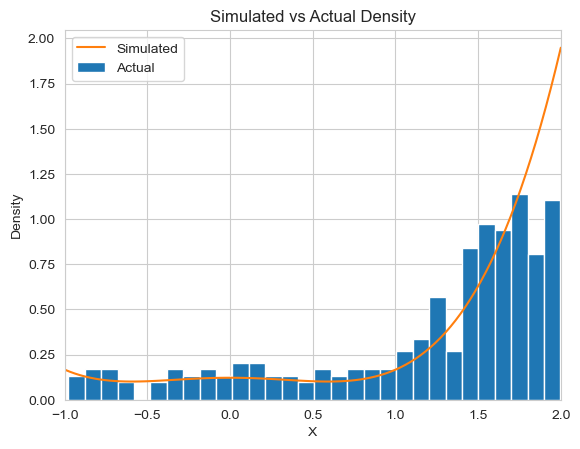

In [54]:
# 4.3
# plot histogram of samples
count, bins, ignored = plt.hist(samp[accept], 30, density=True)
# plot actual density function
x = np.linspace(-1, 2, 100)
plt.plot(x, density(x))
plt.legend(['Simulated','Actual'])
plt.xlim(-1,2)
plt.xlabel('X')
plt.ylabel('Density')
plt.title('Simulated vs Actual Density')
plt.show()